Завдання 1

Візьми код симуляції із завдання 7 домашнього завдання до теми 7 “Теорія ймовірностей. Комбінаторика”. Будемо вважати, що зміна ціни акцій у кожний момент часу дорівнює 𝑥∼Γ(0.3,1.1)x∼Γ(0.3,1.1), де Г — позначення гамма-розподілу.
Необхідно запустити симуляцію n=100 разів для різних значень часу t.
а) Побудуй гістограму розподілу х
б) Запусти симуляцію з t від 1 до, наприклад, ~60 з кроком, наприклад, 1 або 2.
Для кожного значення t побудуй гістограму розподілу ціни та перевір його на нормальність. Зроби висновки про зміну розподілу зі збільшенням t.

In [2]:
import numpy as np
from scipy.stats import gamma, norm, kstest

def stock_price_at_time(t):
    price = 0
    for _ in range(t):
        price += gamma.rvs(0.3, scale=1.1)
    return price

def simulate_n_times(n: int, t: int) -> list:
    np.random.seed(42)
    prices = [stock_price_at_time(t) for _ in range(n)]
    return prices

n = 100
t_values = range(1, 61, 2)


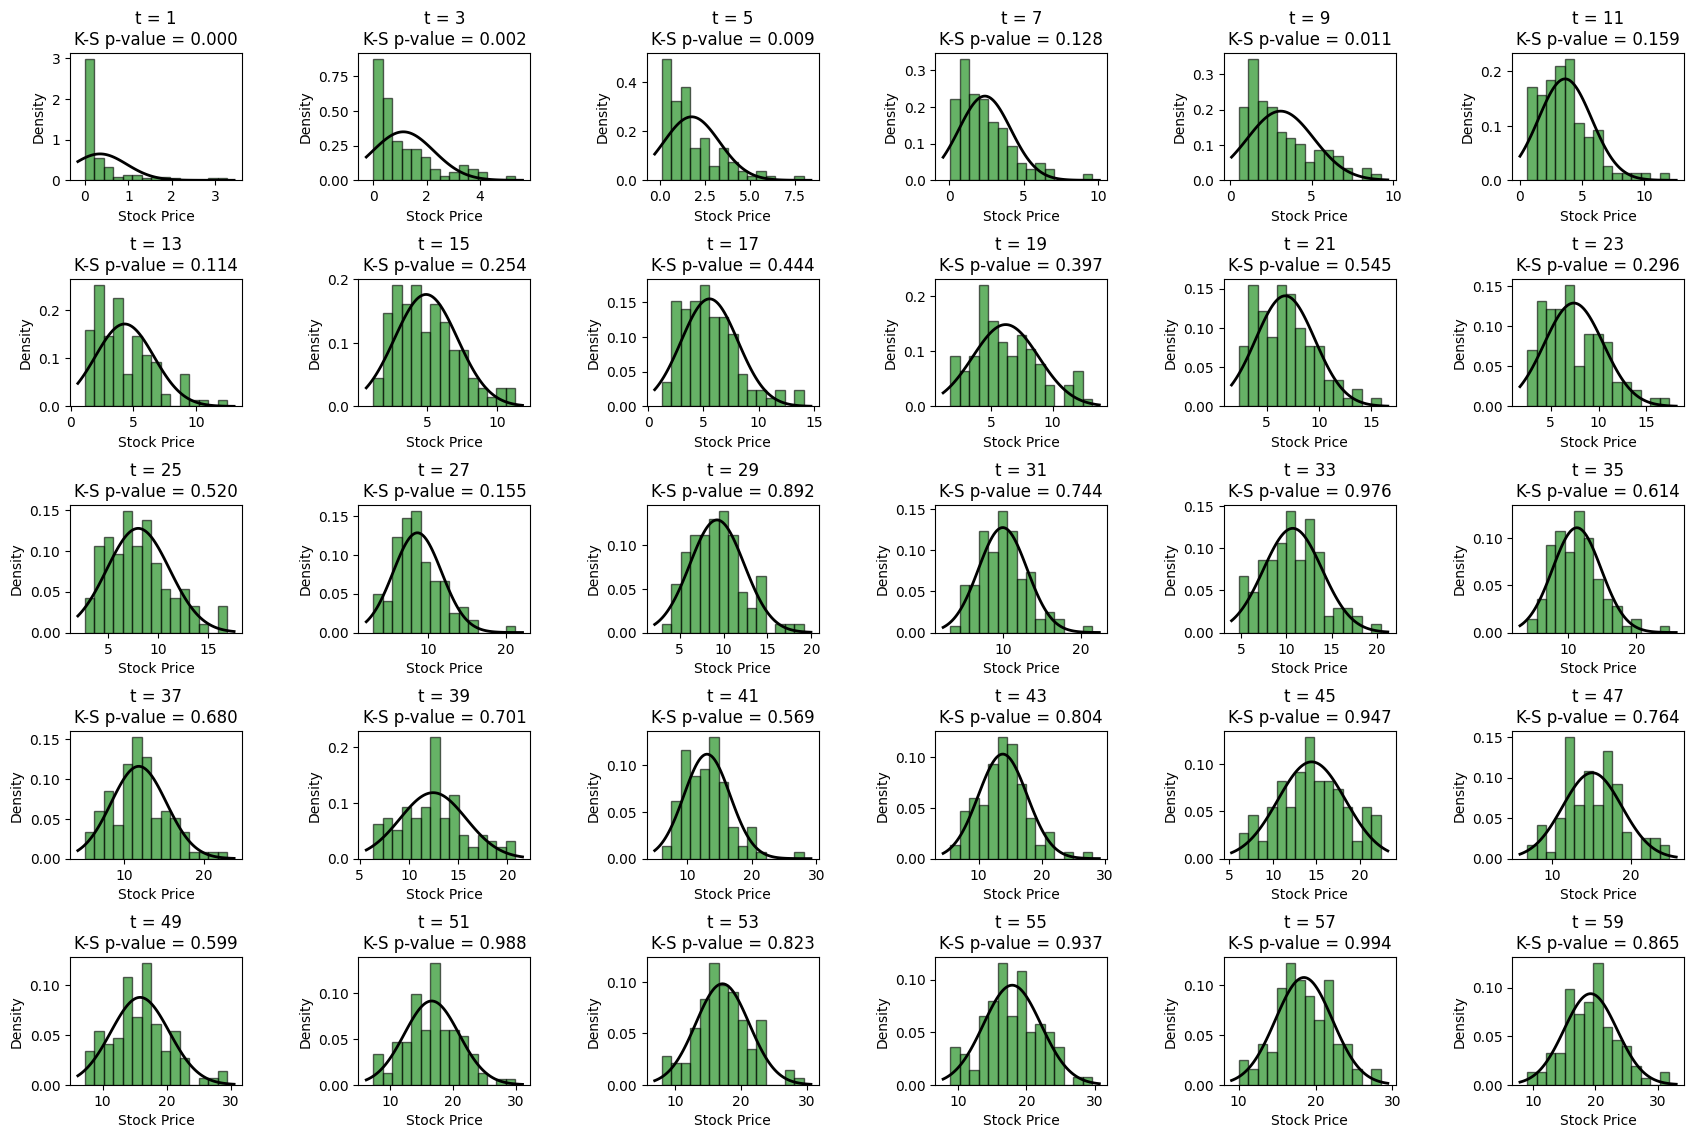

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 6, figsize=(18, 12))
fig.tight_layout(pad=5.0)

for idx, t in enumerate(t_values):
    prices = simulate_n_times(n, t)
    mean_price = np.mean(prices)
    std_price = np.std(prices)

    ax = axes[idx // 6, idx % 6]
    ax.hist(prices, bins=15, density=True, alpha=0.6, color='g', edgecolor='k')

    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean_price, std_price)
    ax.plot(x, p, 'k', linewidth=2)

    kstest_result = kstest(prices, 'norm', args=(mean_price, std_price))
    ax.set_title(f't = {t}\nK-S p-value = {kstest_result.pvalue:.3f}')
    ax.set_xlabel('Stock Price')
    ax.set_ylabel('Density')

plt.show()


Завдання 2

Завантаж набір даних Product Advertising Data (посилання на диск). Набір даних складається із семи стовпчиків, що відображають витрати на рекламу на різних платформах — телебачення, білборди, Google Ads, соціальні медіа, інфлюенс-маркетинг та партнерський маркетинг.



Останній стовпчик, "Product_Sold", містить кількісну оцінку відповідної кількості проданих одиниць товару. Для кожної колонки порахуй середнє значення, дисперсію, стандартне відхилення, побудуй гістограму розподілу показника, перевір на нормальність розподілу та порахуй кореляцію з Product_Sold.



In [15]:
import pandas as pd
url = 'https://docs.google.com/spreadsheets/d/18WCpPS96Tb3cB0FCsIA92PEhcmBkp08sjYhS9DsQfJE/edit#gid=954244094'
url = url[:url.find('/edit')] + '/export?format=csv'
df = pd.read_csv(url)


In [18]:
df.mean()

TV                       517.431000
Billboards               502.644933
Google_Ads               512.444133
Social_Media             489.800100
Influencer_Marketing     465.732567
Affiliate_Marketing      484.430633
Product_Sold            7031.523333
dtype: float64

In [19]:
df.var()

TV                      8.301013e+04
Billboards              7.608901e+04
Google_Ads              8.146593e+04
Social_Media            7.501240e+04
Influencer_Marketing    8.312501e+04
Affiliate_Marketing     7.725924e+04
Product_Sold            2.902304e+06
dtype: float64

In [20]:
df.std()

TV                       288.114792
Billboards               275.842369
Google_Ads               285.422376
Social_Media             273.883915
Influencer_Marketing     288.314080
Affiliate_Marketing      277.955458
Product_Sold            1703.614951
dtype: float64

<ipython-input-23-588f474adbcc>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


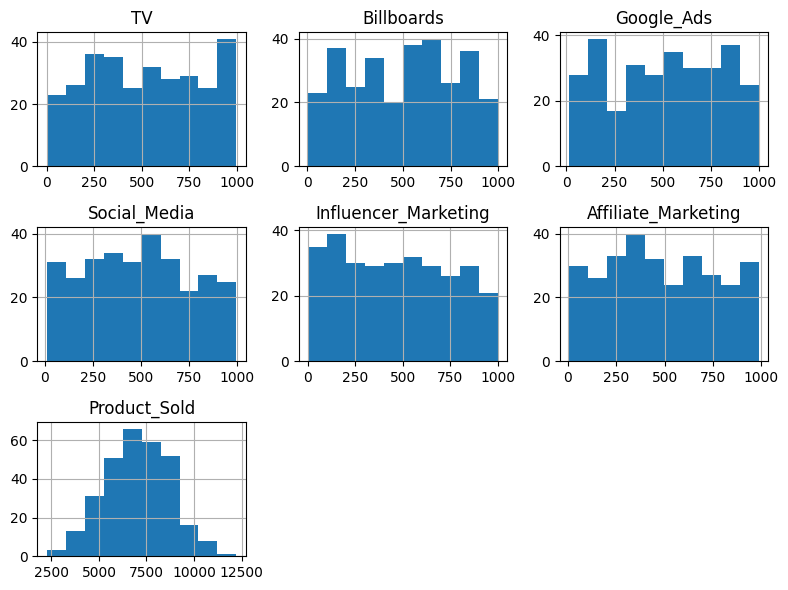

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
df.hist(ax=ax)
fig.tight_layout()

In [25]:
df.corr()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
TV,1.000000,-0.028851,0.025265,-0.038993,0.009970,0.087524,0.374228
Billboards,-0.028851,1.000000,0.052991,0.048722,-0.005815,-0.041060,0.480593
Google_Ads,0.025265,0.052991,1.000000,0.040265,-0.059243,-0.131834,0.203678
Social_Media,-0.038993,0.048722,0.040265,1.000000,-0.042679,-0.019522,0.401088
Influencer_Marketing,0.009970,-0.005815,-0.059243,-0.042679,1.000000,-0.047093,0.140844
Affiliate_Marketing,0.087524,-0.041060,-0.131834,-0.019522,-0.047093,1.000000,0.611603
Product_Sold,0.374228,0.480593,0.203678,0.401088,0.140844,0.611603,1.000000


<Axes: >

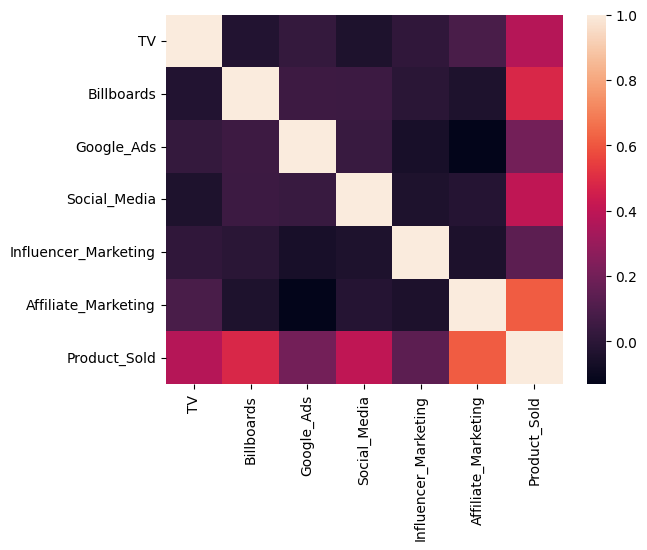

In [27]:
import seaborn as sns
sns.heatmap(df.corr())

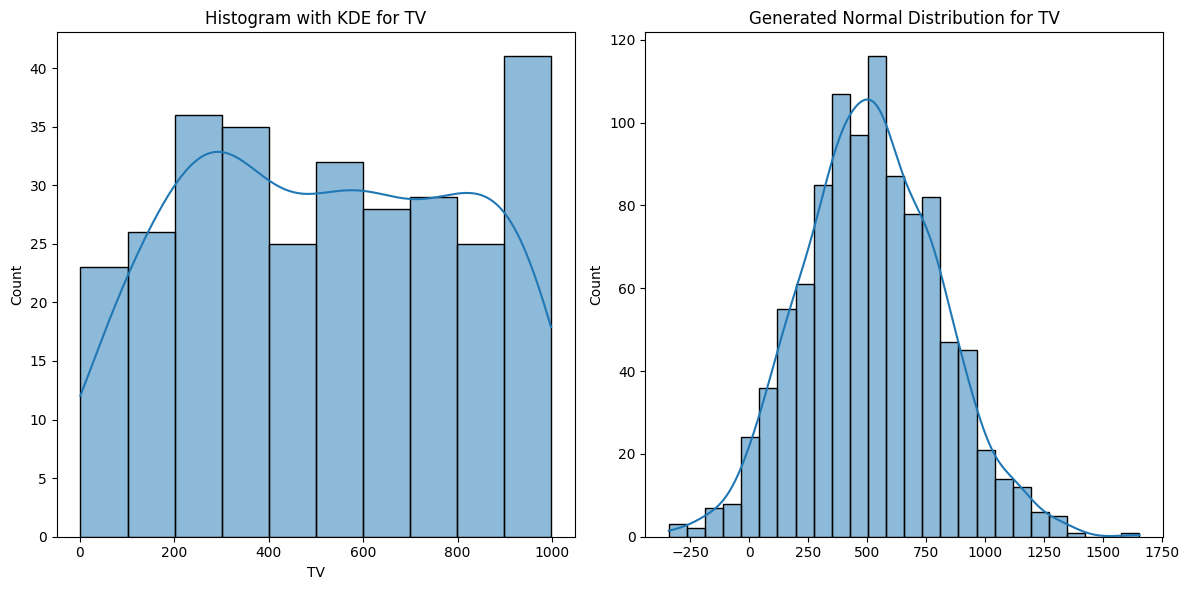

<Figure size 600x600 with 0 Axes>

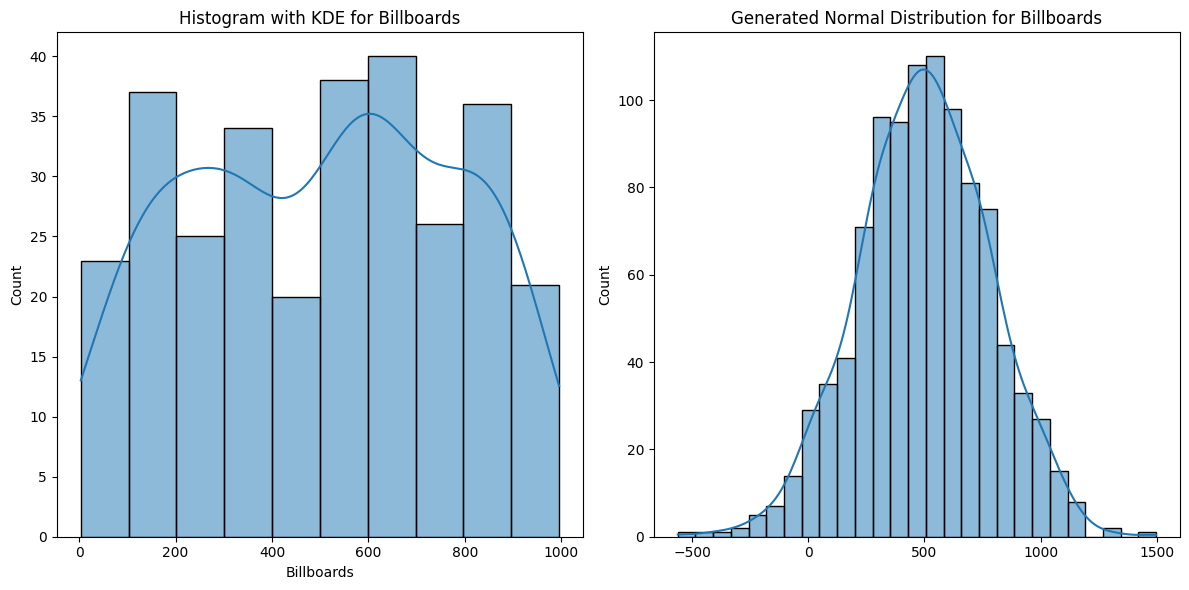

<Figure size 600x600 with 0 Axes>

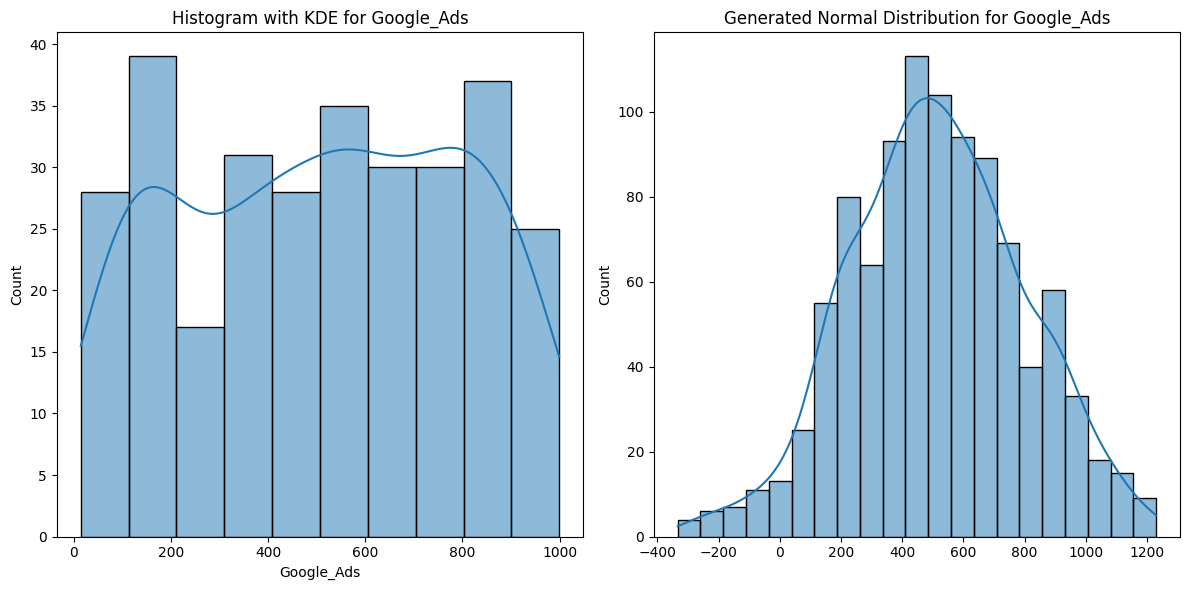

<Figure size 600x600 with 0 Axes>

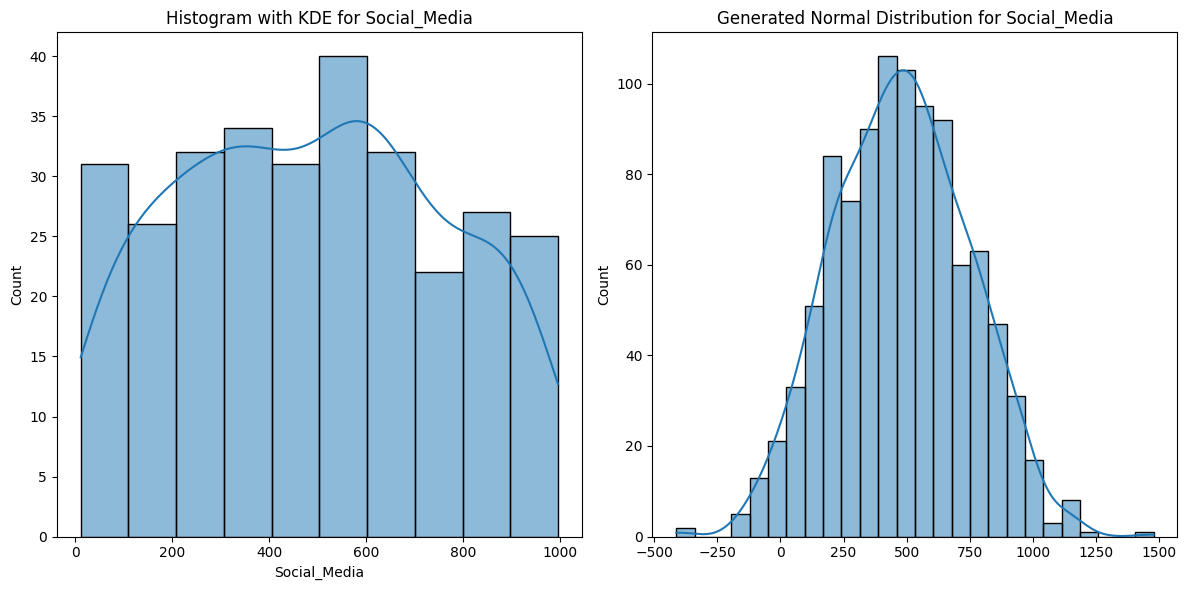

<Figure size 600x600 with 0 Axes>

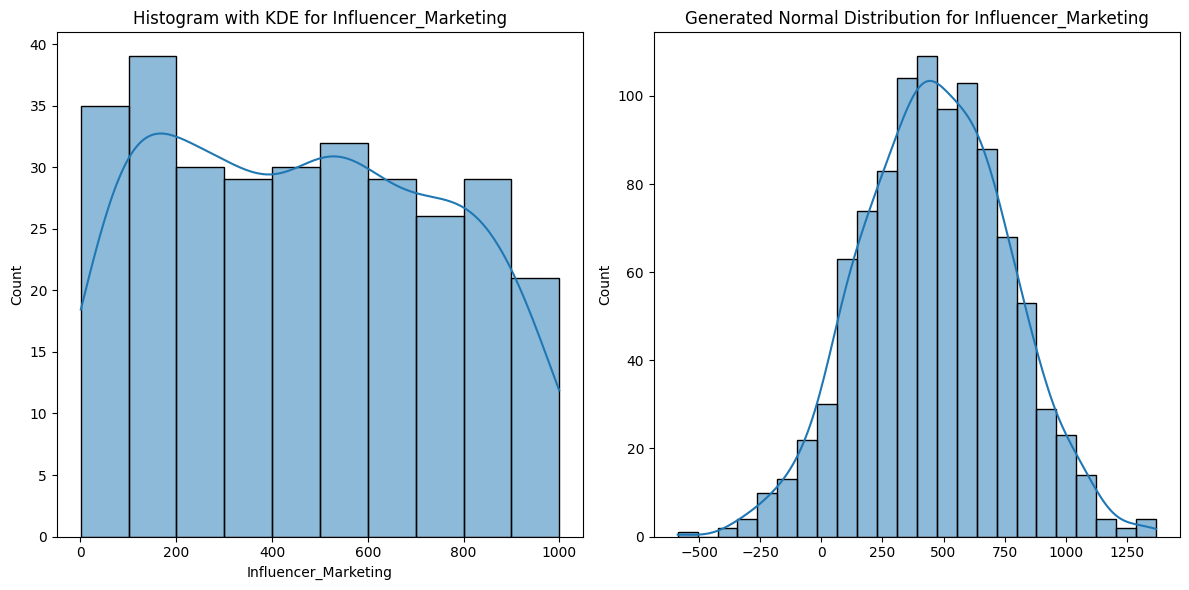

<Figure size 600x600 with 0 Axes>

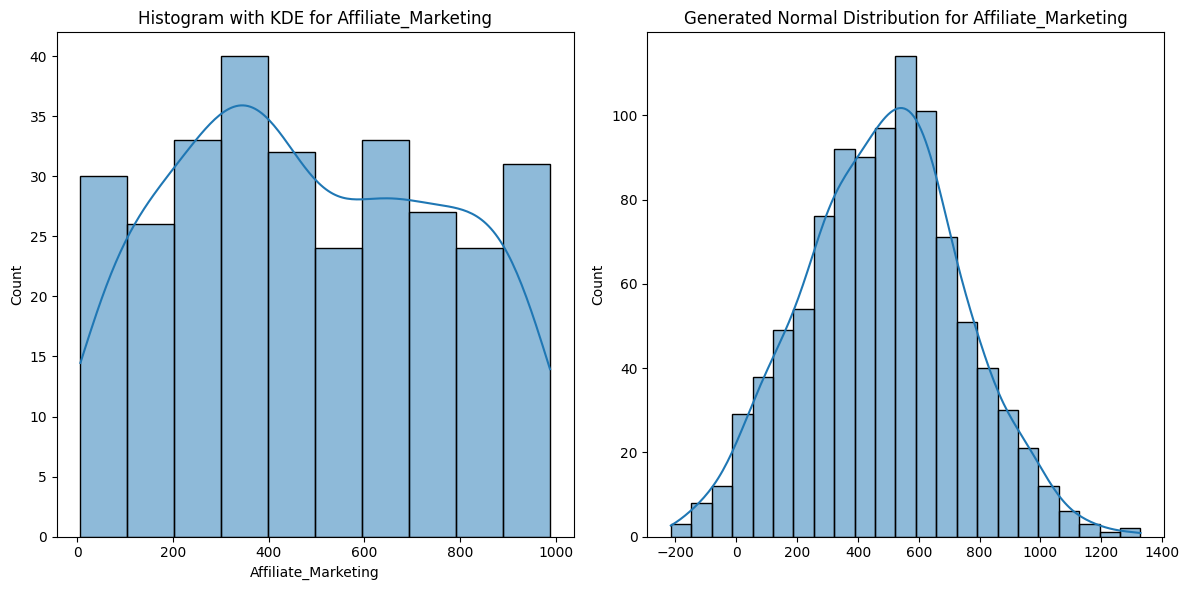

<Figure size 600x600 with 0 Axes>

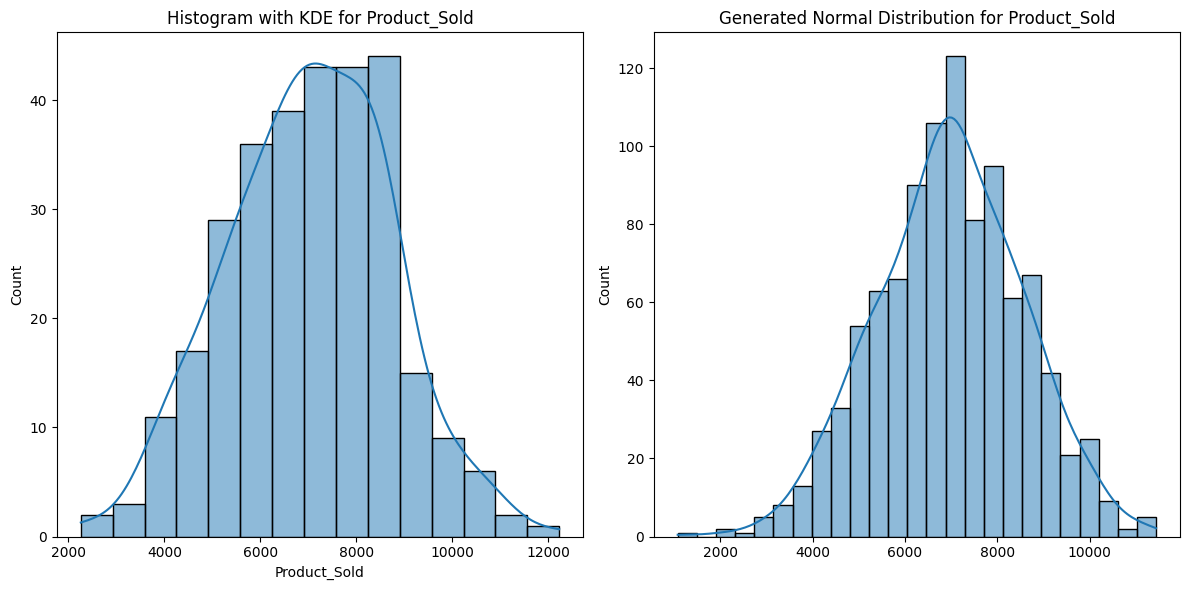

<Figure size 600x600 with 0 Axes>

In [31]:
from scipy.stats import shapiro, kstest, norm

columns_to_check = [
    'TV',
    'Billboards',
    'Google_Ads',
    'Social_Media',
    'Influencer_Marketing',
    'Affiliate_Marketing',
    'Product_Sold'
]

def check_normality(data):
    shapiro_test = shapiro(data)
    return shapiro_test

for column in columns_to_check:
    data = df[column].dropna()

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True)
    plt.title(f'Histogram with KDE for {column}')

    plt.subplot(1, 2, 2)
    norm_data = norm.rvs(loc=data.mean(), scale=data.std(), size=1000)
    sns.histplot(norm_data, kde=True)
    plt.title(f'Generated Normal Distribution for {column}')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 6))
    #stats.probplot(data, dist="norm", plot=plt)
    #plt.title(f'Q-Q Plot for {column}')
    plt.show()